In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set default style and enable show

In [372]:
%matplotlib inline
sns.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

Import Titanic data

In [373]:
tdf = pd.read_csv('titanic_train.csv')

In [374]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [375]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [376]:
tdf['Embarked'].unique() # locations they boarded the ship

array(['S', 'C', 'Q', nan], dtype=object)

Let us understand who survived 

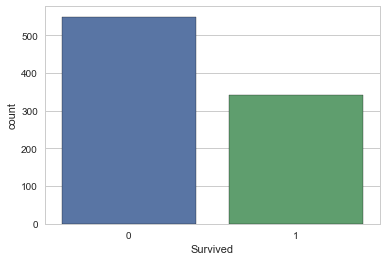

In [377]:
sns.countplot(tdf['Survived'])

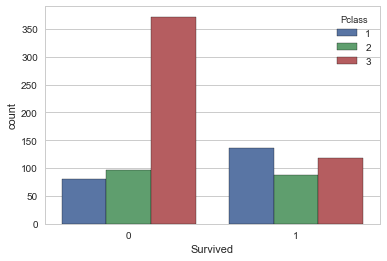

In [378]:
sns.countplot(tdf['Survived'],hue=tdf['Pclass'])

Probability of survival is dependent on the class that people belonging to class 1 are more likely to survive than belong to class 3

let us understand the relation ship between pclass and ticket price

In [379]:
tdf['Fare'].max()

512.32920000000001

In [380]:
tdf['Fare'].min()

0.0

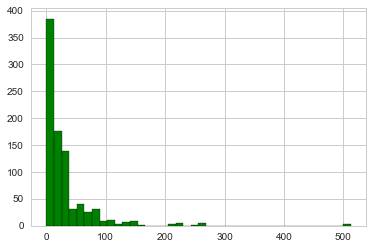

In [381]:
tdf['Fare'].hist(color = 'Green',bins=40)

Majority of the Fare lies between 0 to 50

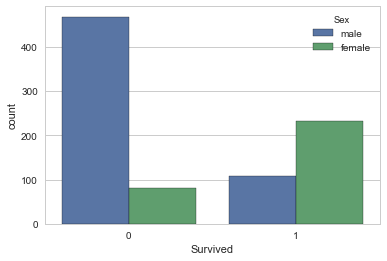

In [382]:
sns.countplot(tdf['Survived'],hue=tdf['Sex'])

Sex has an impact on the survival , Females are more likely to survive than male

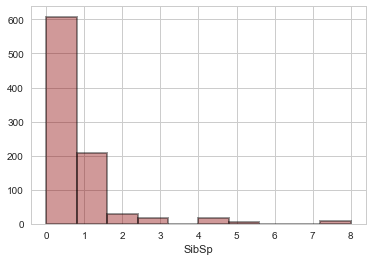

In [383]:
sns.distplot(tdf['SibSp'],color='darkred',kde=False,bins=10,hist_kws=dict(edgecolor="k", linewidth=2))

Most of the passengers are single. nearly one-fifth of them have a spouse or sibling on board

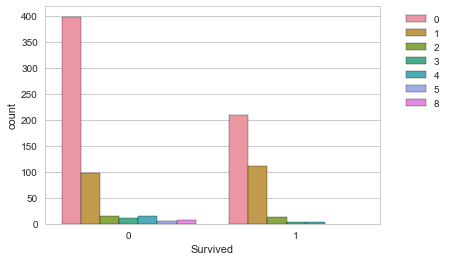

In [384]:
sns.countplot(tdf['Survived'],hue=tdf['SibSp']).legend(bbox_to_anchor=(1.05, 1))

People with 1 or 2 onboard as spouse/siblings have more chance of survival than passengers who are single

In [385]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [386]:
#sns.countplot(tdf['Survived'],hue=tdf['CabinArea']).legend(bbox_to_anchor=(1.05, 1))

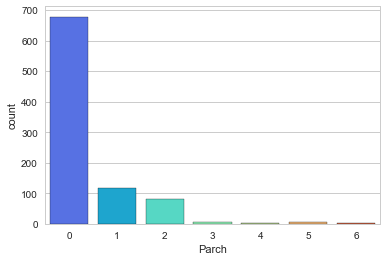

In [387]:
sns.countplot(tdf['Parch'],palette='rainbow')

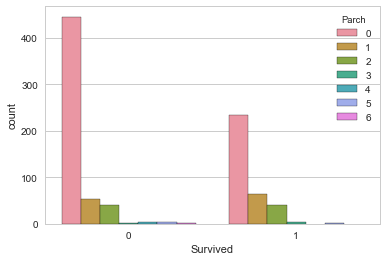

In [388]:
sns.countplot(tdf['Survived'],hue=tdf['Parch'])

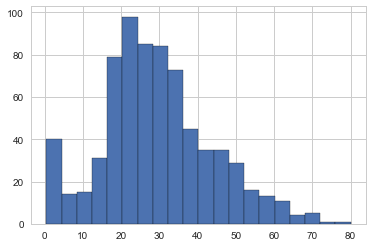

In [389]:
tdf['Age'].dropna().hist(bins =20)

Analyze the columns to decide on preprocessing 

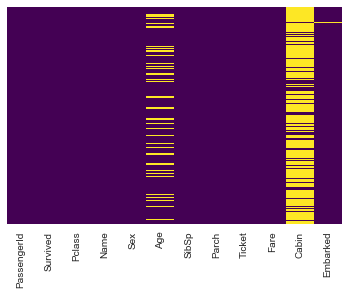

In [390]:
sns.heatmap(tdf.isnull(),annot=False, yticklabels=False,cbar=False,cmap='viridis')

We find missing data in Age, Cabin and Embarked. Embarked has only one missing data. 

Let us analyse the age and identify on how to fill the missing data in it. 
There are many ways to do it. 
 - Populating mean/average for all the missing data
 - Relate age to some other column find a relation and update based on the relation. 

let's take the second approach

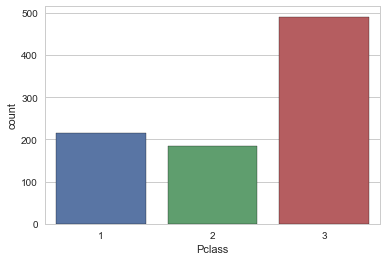

In [391]:
sns.countplot(tdf['Pclass'])

We find that the majority of the passengers are from class 3. let us look at their average age of each class

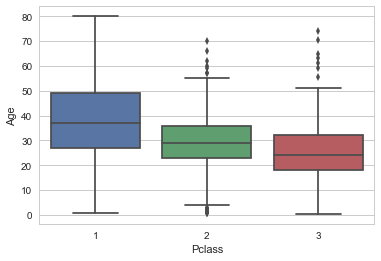

In [392]:
sns.boxplot(x='Pclass',data=tdf,y='Age')

We find that average age for class 1 is 37, class 2 is 28  and class 3 is 24. So we shall update the age with their mean based on their class

In [393]:
def determine_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if(pclass == 1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age
    
determine_age([np.nan,2])

29

In [394]:
tdf['Age'] = tdf[['Age','Pclass']].apply(determine_age,axis=1)

In [395]:
tdf['Title']= tdf['Name'].apply(lambda name:name.split('.')[0].split(',')[1].strip())

In [396]:
#tdf['Cabin'].fillna('U')
#tdf['CabinArea']= tdf['Cabin'].fillna('U').apply(lambda cabintext:np.nan if pd.isnull(cabintext) else cabintext[0])

In [397]:
#tdf['CabinAvailable'] = tdf['Cabin'].apply(lambda x: 0 if pd.isnull(x)else 1)
#tdf.drop(labels=['CabinAvailable'], axis =1, inplace=True)

In [398]:
tdf.drop(labels=['Cabin'], axis =1, inplace=True)

In [399]:
tdf.drop(labels=['Name','Ticket'], axis =1, inplace=True)

In [400]:
tdf.dropna(inplace=True)

In [401]:
Embark = pd.get_dummies(tdf['Embarked'],drop_first=True)
Sex = pd.get_dummies(tdf['Sex'],drop_first=True)

In [402]:
#Cabin_Dummy = pd.get_dummies(tdf['CabinArea'])
#Cabin_Dummy.drop(labels='U',axis=1,inplace=True)

In [403]:
#Pclass = pd.get_dummies(tdf['Pclass'],drop_first=True)

In [404]:
tdf.drop(labels=['Embarked','Sex'], axis =1, inplace=True)

In [405]:
TitleDummies = pd.get_dummies(tdf['Title'],drop_first=True)

In [406]:
tdf = pd.concat([tdf,Sex,Embark],axis=1)

In [407]:
tdf = pd.concat([tdf,TitleDummies],axis=1)

In [408]:
#tdf = pd.concat([tdf,Cabin_Dummy],axis=1)

In [409]:
#tdf.drop(labels=['CabinArea'], axis =1, inplace=True)

In [410]:
tdf.drop(labels=['Title'], axis =1, inplace=True)

In [411]:
#tdf.dropna(inplace=True)

In [412]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 26 columns):
PassengerId     889 non-null int64
Survived        889 non-null int64
Pclass          889 non-null int64
Age             889 non-null float64
SibSp           889 non-null int64
Parch           889 non-null int64
Fare            889 non-null float64
male            889 non-null uint8
Q               889 non-null uint8
S               889 non-null uint8
Col             889 non-null uint8
Don             889 non-null uint8
Dr              889 non-null uint8
Jonkheer        889 non-null uint8
Lady            889 non-null uint8
Major           889 non-null uint8
Master          889 non-null uint8
Miss            889 non-null uint8
Mlle            889 non-null uint8
Mme             889 non-null uint8
Mr              889 non-null uint8
Mrs             889 non-null uint8
Ms              889 non-null uint8
Rev             889 non-null uint8
Sir             889 non-null uint8
the Countess    

In [413]:
X = tdf.drop(labels=['Survived','Fare'],axis=1)
y = tdf['Survived']

In [414]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S,Col,Don,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,3,22.0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,3,26.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,3,35.0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [415]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

In [416]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(X_train,y_train)
predicted  = lrm.predict(X_test)

In [417]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,predicted))

[[152  11]
 [ 28  76]]


In [418]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.84      0.93      0.89       163
          1       0.87      0.73      0.80       104

avg / total       0.86      0.85      0.85       267

